# Sentiment Analysis Project

### Internship Task 4 - Data Analytics Internship 
### Sentiment Analysis on Social Media Text Data 

This project focuses on analyzing text data to classify sentiment as positive, negative, or neutral using Natural Language Processing and machine learning techniques.


## Project Objectives 
- Understand and preprocess text data
- Peform text cleaning and normalization
- Convert text into numerical features
- Build a sentiment classification model
- Evaluate model performance
- Visualize sentiment distribution 

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import re 
import string 
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
plt.style.use("default")

In [3]:
df=pd.read_csv("C:/Users/agast/Downloads/Twitter_Data.csv")
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


## Dataset Overview

The dataset contains text data collected from social media,
along with sentiment labels representing positive, negative,
or neutral sentiment.


In [4]:
df.shape

(162980, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


## Text Data Cleaning

In [7]:
df.dropna(inplace=True)


In [8]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    return text


In [9]:
df['clean_text'] = df['clean_text'].apply(clean_text)
df[['clean_text']].head()


,clean_text
0,when modi promised “minimum government maximum...
1,talk all the nonsense and continue all the dra...
2,what did just say vote for modi welcome bjp t...
3,asking his supporters prefix chowkidar their n...
4,answer who among these the most powerful world...


## Sentiment Distribution 

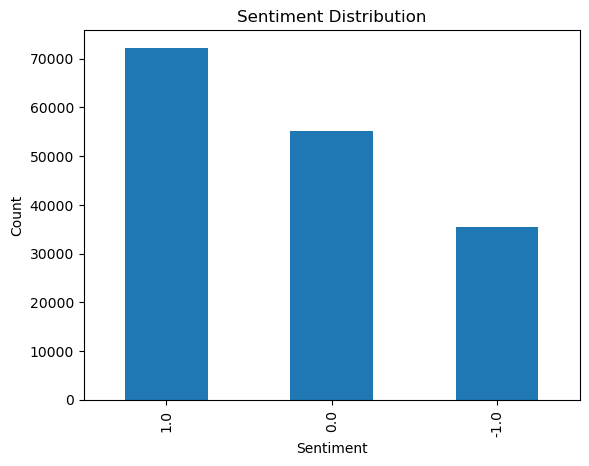

In [10]:
df['category'].value_counts().plot(kind='bar')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

## Feature Extraction / Feature Engineering using TF-IDF 
TF-IDF converts text data into numerical features that ML Models can understand.

In [11]:
X = df['clean_text']
y = df['category']

vectorizer = TfidfVectorizer(max_features=5000)
X_vectorized = vectorizer.fit_transform(X)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X_vectorized, y, test_size=0.2, random_state=42
)


## Sentiment Classification using Naive Bayes 

In [13]:
model = MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

In [14]:
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

0.735810271829171

In [15]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        -1.0       0.91      0.41      0.57      7152
         0.0       0.87      0.67      0.76     11067
         1.0       0.65      0.95      0.77     14375

    accuracy                           0.74     32594
   macro avg       0.81      0.68      0.70     32594
weighted avg       0.78      0.74      0.72     32594



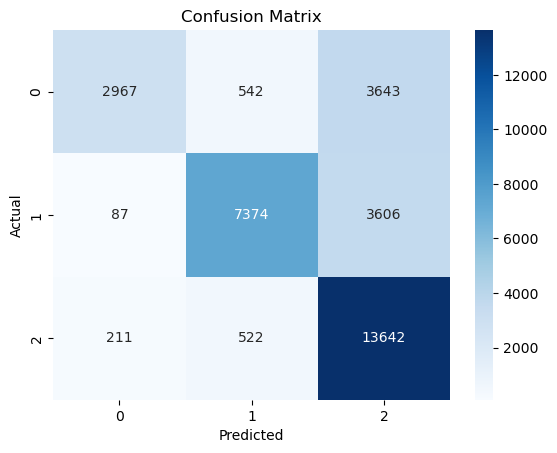

In [16]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## Key Insights

- The model is able to classify sentiments with reasonable accuracy
- Text preprocessing significantly improves model performance
- Naive Bayes performs well for sentiment classification tasks

## Conclusion

This project demonstrates how sentiment analysis can be performed using NLP techniques and machine learning algorithms. 
The model successfully classifies text into positive, negative, and neutral sentiments, providing valuable insights into public opinion.